In [1]:
#HM Land Registry Prioce Paid Monthly Data (2017 latest)

#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [31]:
#import dataset
column = ['txnid', 'price', 'date_of_transfer', 'postcode', 'ptype', 'o/n', 'duration', 'paon', 'saon' ,'street','locality','town/city','district','county','ppd','rstatus']
data = pd.read_csv('C:/Hari Docs/Dataset/HM-Land-Registry-price-paid.csv', names=column)
data.head(7)

,txnid,price,date_of_transfer,postcode,ptype,o/n,duration,paon,saon,street,locality,town/city,district,county,ppd,rstatus
0,{5F54B81C-D27C-2B45-E053-6B04A8C01FB0},185000,13/08/2004,TR12 7BH,T,N,F,1,NaN,CHAPEL TERRACE,CURY,HELSTON,CORNWALL,CORNWALL,A,A
1,{5F54B81C-D771-2B45-E053-6B04A8C01FB0},58000,15/09/2004,LL29 7LD,F,N,L,48,FLAT 1,CONWAY ROAD,NaN,COLWYN BAY,CONWY,CONWY,A,A
2,{5F54B81C-DF90-2B45-E053-6B04A8C01FB0},153950,30/01/2004,SA3 5TJ,F,N,L,CWRT BEAUFORT,APARTMENT 15,PALMYRA COURT,WEST CROSS,SWANSEA,SWANSEA,SWANSEA,A,A
3,{5F54B81C-E083-2B45-E053-6B04A8C01FB0},95000,14/05/2004,PL7 2QP,F,N,L,32,NaN,BELLINGHAM CRESCENT,NaN,PLYMOUTH,CITY OF PLYMOUTH,CITY OF PLYMOUTH,A,A
4,{5F54B81C-E37D-2B45-E053-6B04A8C01FB0},420000,30/06/2004,TQ7 2SE,F,N,L,STOKELEY MANOR,THE BALLROOM,NaN,STOKENHAM,KINGSBRIDGE,SOUTH HAMS,DEVON,A,A
5,{5F54B81C-EEFC-2B45-E053-6B04A8C01FB0},30000,01/03/2004,BH6 3DJ,F,N,F,127,FLAT 1,BELLE VUE ROAD,SOUTHBOURNE,BOURNEMOUTH,BOURNEMOUTH,BOURNEMOUTH,A,A
6,{5F54B81C-F6F7-2B45-E053-6B04A8C01FB0},270000,01/11/2004,S44 5SB,S,N,F,CHURCH CLOSE COTTAGE,NaN,MANSFIELD ROAD,HEATH,CHESTERFIELD,NORTH EAST DERBYSHIRE,DERBYSHIRE,A,A


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175877 entries, 0 to 175876
Data columns (total 16 columns):
txnid               175877 non-null object
price               175877 non-null int64
date_of_transfer    175877 non-null object
postcode            174877 non-null object
ptype               175877 non-null object
o/n                 175877 non-null object
duration            175877 non-null object
paon                175877 non-null object
saon                24195 non-null object
street              172847 non-null object
locality            74390 non-null object
town/city           175877 non-null object
district            175877 non-null object
county              175877 non-null object
ppd                 175877 non-null object
rstatus             175877 non-null object
dtypes: int64(1), object(15)
memory usage: 21.5+ MB


In [35]:
data['date_of_transfer'] = pd.to_datetime(data['date_of_transfer'])


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175877 entries, 0 to 175876
Data columns (total 16 columns):
txnid               175877 non-null object
price               175877 non-null int64
date_of_transfer    175877 non-null datetime64[ns]
postcode            174877 non-null object
ptype               175877 non-null object
o/n                 175877 non-null object
duration            175877 non-null object
paon                175877 non-null object
saon                24195 non-null object
street              172847 non-null object
locality            74390 non-null object
town/city           175877 non-null object
district            175877 non-null object
county              175877 non-null object
ppd                 175877 non-null object
rstatus             175877 non-null object
dtypes: datetime64[ns](1), int64(1), object(14)
memory usage: 21.5+ MB


In [37]:
#reduce rows to sample 15000 rows
data = data.iloc[0:15000,:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
txnid               15000 non-null object
price               15000 non-null int64
date_of_transfer    15000 non-null datetime64[ns]
postcode            14920 non-null object
ptype               15000 non-null object
o/n                 15000 non-null object
duration            15000 non-null object
paon                15000 non-null object
saon                2122 non-null object
street              14668 non-null object
locality            8369 non-null object
town/city           15000 non-null object
district            15000 non-null object
county              15000 non-null object
ppd                 15000 non-null object
rstatus             15000 non-null object
dtypes: datetime64[ns](1), int64(1), object(14)
memory usage: 1.8+ MB


In [42]:
#adding month and year columns
data['month'] = data['date_of_transfer'].dt.month
data['year'] = data['date_of_transfer'].dt.year
data.head()

,txnid,price,date_of_transfer,postcode,ptype,o/n,duration,paon,saon,street,locality,town/city,district,county,ppd,rstatus,month,year
0,{5F54B81C-D27C-2B45-E053-6B04A8C01FB0},185000,2004-08-13,TR12 7BH,T,N,F,1,NaN,CHAPEL TERRACE,CURY,HELSTON,CORNWALL,CORNWALL,A,A,8,2004
1,{5F54B81C-D771-2B45-E053-6B04A8C01FB0},58000,2004-09-15,LL29 7LD,F,N,L,48,FLAT 1,CONWAY ROAD,NaN,COLWYN BAY,CONWY,CONWY,A,A,9,2004
2,{5F54B81C-DF90-2B45-E053-6B04A8C01FB0},153950,2004-01-30,SA3 5TJ,F,N,L,CWRT BEAUFORT,APARTMENT 15,PALMYRA COURT,WEST CROSS,SWANSEA,SWANSEA,SWANSEA,A,A,1,2004
3,{5F54B81C-E083-2B45-E053-6B04A8C01FB0},95000,2004-05-14,PL7 2QP,F,N,L,32,NaN,BELLINGHAM CRESCENT,NaN,PLYMOUTH,CITY OF PLYMOUTH,CITY OF PLYMOUTH,A,A,5,2004
4,{5F54B81C-E37D-2B45-E053-6B04A8C01FB0},420000,2004-06-30,TQ7 2SE,F,N,L,STOKELEY MANOR,THE BALLROOM,NaN,STOKENHAM,KINGSBRIDGE,SOUTH HAMS,DEVON,A,A,6,2004


In [54]:
#changing the order of columns 
col = data.columns.tolist()
col

['txnid',
 'price',
 'date_of_transfer',
 'postcode',
 'ptype',
 'o/n',
 'duration',
 'paon',
 'saon',
 'street',
 'locality',
 'town/city',
 'district',
 'county',
 'ppd',
 'rstatus',
 'month',
 'year']

In [57]:
col1 = col[0:2]+col[-2:]+col[2:16]
data = data[col1]
data.head()

,txnid,price,month,year,date_of_transfer,postcode,ptype,o/n,duration,paon,saon,street,locality,town/city,district,county,ppd,rstatus
0,{5F54B81C-D27C-2B45-E053-6B04A8C01FB0},185000,8,2004,2004-08-13,TR12 7BH,T,N,F,1,NaN,CHAPEL TERRACE,CURY,HELSTON,CORNWALL,CORNWALL,A,A
1,{5F54B81C-D771-2B45-E053-6B04A8C01FB0},58000,9,2004,2004-09-15,LL29 7LD,F,N,L,48,FLAT 1,CONWAY ROAD,NaN,COLWYN BAY,CONWY,CONWY,A,A
2,{5F54B81C-DF90-2B45-E053-6B04A8C01FB0},153950,1,2004,2004-01-30,SA3 5TJ,F,N,L,CWRT BEAUFORT,APARTMENT 15,PALMYRA COURT,WEST CROSS,SWANSEA,SWANSEA,SWANSEA,A,A
3,{5F54B81C-E083-2B45-E053-6B04A8C01FB0},95000,5,2004,2004-05-14,PL7 2QP,F,N,L,32,NaN,BELLINGHAM CRESCENT,NaN,PLYMOUTH,CITY OF PLYMOUTH,CITY OF PLYMOUTH,A,A
4,{5F54B81C-E37D-2B45-E053-6B04A8C01FB0},420000,6,2004,2004-06-30,TQ7 2SE,F,N,L,STOKELEY MANOR,THE BALLROOM,NaN,STOKENHAM,KINGSBRIDGE,SOUTH HAMS,DEVON,A,A


In [76]:
#Dropping unwanted columns
data = data.drop('txnid', axis = 1)
data.head()

,price,month,year,date_of_transfer,postcode,ptype,o/n,duration,paon,saon,street,locality,town/city,district,county,ppd,rstatus
0,185000,8,2004,2004-08-13,TR12 7BH,T,N,F,1,NaN,CHAPEL TERRACE,CURY,HELSTON,CORNWALL,CORNWALL,A,A
1,58000,9,2004,2004-09-15,LL29 7LD,F,N,L,48,FLAT 1,CONWAY ROAD,NaN,COLWYN BAY,CONWY,CONWY,A,A
2,153950,1,2004,2004-01-30,SA3 5TJ,F,N,L,CWRT BEAUFORT,APARTMENT 15,PALMYRA COURT,WEST CROSS,SWANSEA,SWANSEA,SWANSEA,A,A
3,95000,5,2004,2004-05-14,PL7 2QP,F,N,L,32,NaN,BELLINGHAM CRESCENT,NaN,PLYMOUTH,CITY OF PLYMOUTH,CITY OF PLYMOUTH,A,A
4,420000,6,2004,2004-06-30,TQ7 2SE,F,N,L,STOKELEY MANOR,THE BALLROOM,NaN,STOKENHAM,KINGSBRIDGE,SOUTH HAMS,DEVON,A,A


In [78]:
data['year'].value_counts()

2003    4385
2004    4346
2017    2129
2016    1469
2015     380
2005     320
2002     276
2014     180
2007     161
2001     157
2006     139
2000     119
2013     112
1997     110
1999      98
1996      91
2012      85
1998      78
2009      77
1995      75
2008      75
2011      69
2010      69
Name: year, dtype: int64

In [79]:
#Visualization
import seaborn as sb

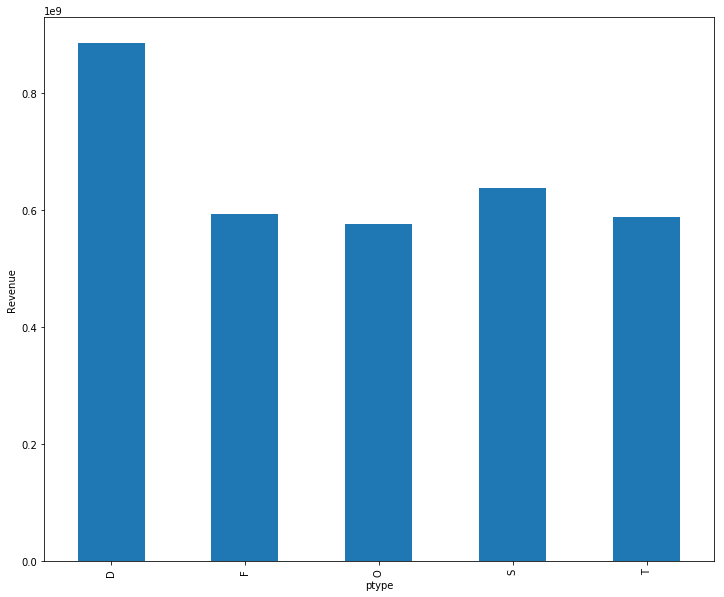

In [84]:
var = data.groupby('ptype').price.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('ptype')
ax1.set_ylabel('Revenue')
var.plot(kind = 'bar')
